## Load data

In [1]:
from dmml_project.dataset import Dataset
from dmml_project import PROJECT_ROOT, PAPER_IMAGES
import matplotlib.pyplot as plt
import seaborn as sns

dataset: Dataset = Dataset.load(f'{PROJECT_ROOT}/data/dataset.tsv')

## Data exploration

### Class distribution

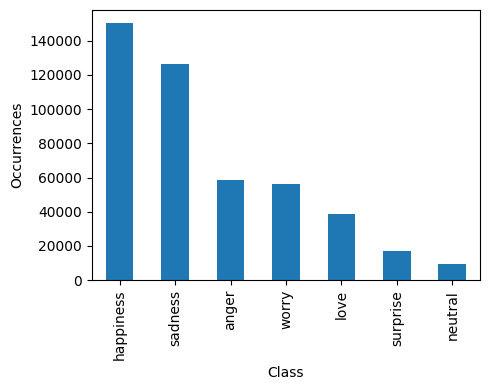

In [2]:
fig = plt.figure(figsize=(5, 4))
dataset.data['label'].value_counts().plot(kind='bar', xlabel='label', ylabel='occurrences')
plt.xlabel("Class")
plt.ylabel("Occurrences")
plt.tight_layout()
plt.savefig(f'{PAPER_IMAGES}/class_distribution.png')
plt.show()

### Length distribution
The length was capped at 400 to make the graph more readable, nearly all sequences are shorter than 400.

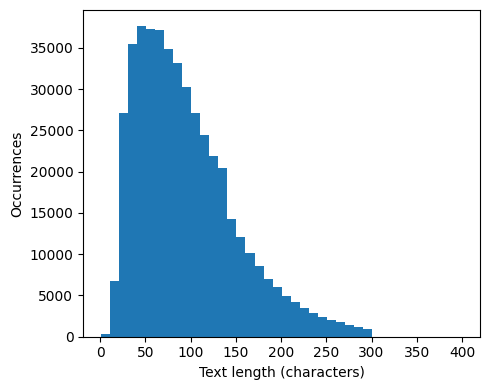

In [3]:
fig = plt.figure(figsize=(5, 4))
plt.hist([min(len(x), 400) for x in dataset.data['text']], bins=40)
plt.xlabel("Text length (characters)")
plt.ylabel("Occurrences")
plt.tight_layout()
plt.savefig(f'{PAPER_IMAGES}/length_distribution.png')
plt.show()

## Preprocessing

In [4]:
from dmml_project.preprocessor import Preprocessor

pp: Preprocessor = Preprocessor.load(f"{PROJECT_ROOT}/data/preprocessor/tfidf.pkl")

In [5]:
random_examples = dataset.data['text'].sample(5)
print("Before preprocessing:")
print(random_examples)
print("After preprocessing:")
print(pp(random_examples))

Before preprocessing:
361381    im awake the other half of the time im feeling...
122313    i will feel a little more like myself again an...
355509    i question it because if god loves me and sees...
120026         i feel completely humiliated and embarrassed
388257    i also often feel a little overwhelmed by my n...
Name: text, dtype: object
After preprocessing:
  (0, 3128)	0.5446346660356318
  (0, 4882)	0.470849494095132
  (0, 15793)	0.07645810489019725
  (0, 19737)	0.4655492072412555
  (0, 22179)	0.43171477144097775
  (0, 47425)	0.2696558629362923
  (1, 15793)	0.13628554808387036
  (1, 18097)	0.23637055996273065
  (1, 19280)	0.4178475526499174
  (1, 19477)	0.7179610234135247
  (1, 26808)	0.17560717252627303
  (1, 27024)	0.25948109209008285
  (1, 34664)	0.37057021355598563
  (2, 4088)	0.13475364393924633
  (2, 12623)	0.2228304810029388
  (2, 15793)	0.039510381738850735
  (2, 18551)	0.20347395925310238
  (2, 19931)	0.20184830987468413
  (2, 22179)	0.33463846860505914
  (2, 27505)	0

In [6]:
violin_plot_data = dataset.data.copy()
violin_plot_data['len'] = violin_plot_data['text'].apply(lambda x: len(x))

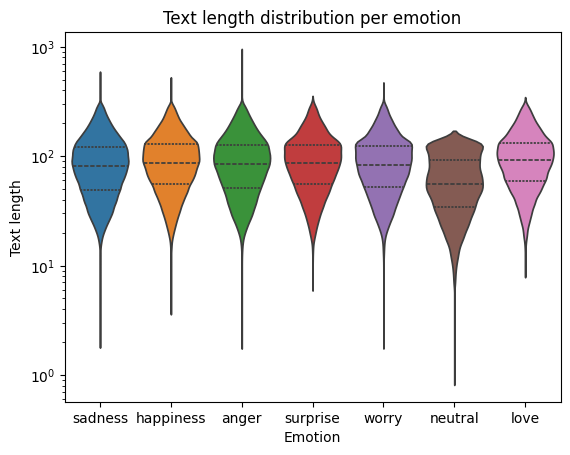

In [7]:
sns.violinplot(data=violin_plot_data, x='label', y='len', hue='label', inner='quartile', log_scale=True).set_title('Text length distribution per emotion')
plt.xlabel('Emotion')
plt.ylabel('Text length')
plt.show()